<a href="https://colab.research.google.com/github/kyook17/BADM576/blob/main/Handling_Missing_Values_Outliers_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Missing Values**

### **Why are Missing Values Problematic?**


Missing values can pose significant challenges both from an analysis and coding perspective.

They can skew statistical measures and often lead to errors as many machine learning models or functions cannot handle missing values (NAs).

### **How are Missing Values Represented in Pandas DataFrame?**

In a Pandas DataFrame, missing values are usually represented as NaN (Not a Number). Let's see how we can work with missing values in Pandas.

### **Identifying Missing Values**

Pandas provides the isnull() method to check for missing values in a DataFrame.

Let's create a sample DataFrame with some missing values and use isnull():





In [ ]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df = pd.DataFrame({
    'A': [1, 2, np.nan],
    'B': [5, np.nan, 6],
    'C': [7, 8, 9]
})

# Using isnull() to identify missing values
print("Actual DataFrame:")
print(df)

print("\nIdentify missing values:")
print(df.isnull())

Actual DataFrame:
     A    B  C
0  1.0  5.0  7
1  2.0  NaN  8
2  NaN  6.0  9

Identify missing values:
       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False


This method simply checks whether a cell in the DataFrame has a missing value or not.

This will print a DataFrame indicating True for missing values and False for others.

#### **Counting Missing Values**

We can chain the .sum() method after isnull() to count the number of missing values in each column:

In [ ]:
print(df.isnull().sum())


A    1
B    1
C    0
dtype: int64


The outut above shows the count of missing values in each column.

### **Ways to Handle Missing Values**

Handling missing values usually involves one of the following three approaches:

1. Removing the row containing the missing value.
2. Filling the missing value with a statistical measure like the mean or median.
3. Using a model to predict the missing values.

*In this course, we'll focus on the first two approaches.*

#### **1. Deleting Rows**

You can remove any row containing a missing value using the ```dropna()``` method on the dataframe object ```df```:

In [ ]:
df_dropped = df.dropna()
print(df_dropped)


     A    B  C
0  1.0  5.0  7


***Note - If you want to save the results in the original dataframe, you may use "```inplace = True```" in the ```dropna()``` method.***

#### **2. Filling Missing Values**

You can fill missing values with the ***mean*** or ***median*** using the ```fillna()``` method:

In [ ]:
# Filling with mean
df_filled_mean = df.fillna(df.mean()) # df.mean() returns a series with mean of each column in df as values and column names as index

print("This is the mean of each column:")
print(df.mean())

print("\n This is the filled dataframe:")
print(df_filled_mean)


This is the mean of each column:
A    1.5
B    5.5
C    8.0
dtype: float64

 This is the filled dataframe:
     A    B  C
0  1.0  5.0  7
1  2.0  5.5  8
2  1.5  6.0  9


***Note - you may supply any value to be filled in place of NAs***

In [ ]:
df_filled_with_0 = df.fillna(0)

print("Data frame where NAs are filled with 0:")
print(df_filled_with_0)

Data frame where NAs are filled with 0:
     A    B  C
0  1.0  5.0  7
1  2.0  0.0  8
2  0.0  6.0  9


### **Practice Question - fill the missing values in the following DataFrame using the median of each column**



In [ ]:
practice_df = pd.DataFrame({
    'X': [10, np.nan, 30],
    'Y': [40, 50, np.nan],
    'Z': [60, 70, 80]
})

practice_df

,X,Y,Z
0,10.0,40.0,60
1,NaN,50.0,70
2,30.0,NaN,80


In [ ]:
# write your code here

# **Duplicates**

### **Duplicate rows**

Sometimes, out data may have duplicate rows that we must remove before any analysis. A duplicate row is one which has exactly same value as any other row preceding it.

###  **Identifying Duplicates**

We can use the method ```.duplicated()``` on the dataframe object to check which rows are duplicates. This method will print True or False based on whether the row is a duplicate or not.

Let's see in the following example.

In [ ]:
df = pd.DataFrame({
    'X': [10, 20, 30, 30],
    'Y': [40, 50, 60, 60],
    'Z': [60, 70, 80, 80]
})

print(df)


    X   Y   Z
0  10  40  60
1  20  50  70
2  30  60  80
3  30  60  80


You may notice that rows at index 2 and 3 are duplicates of each other. When, we use ```.duplicated()``` on ```df```, it will start from the top and go down. Thus, row at index 2 won't be flagged as **duplicate** because no preceding row matched it. However, row at index 3 will be considered **duplicate**.

In [ ]:
# check which rows are duplicates
print(df.duplicated())

# calculate the number of duplicate rows in the dataset
print("\n The number of duplicate rows in the dataset is: ")
print(df.duplicated().sum())

0    False
1    False
2    False
3     True
dtype: bool

 The number of duplicate rows in the dataset is: 
1


### **Removing Duplicates**

We can use ```.drop_duplicates``` to drop the duplicate rows.

In [ ]:
print(df.drop_duplicates())

    X   Y   Z
0  10  40  60
1  20  50  70
2  30  60  80


**Note - Using `drop_duplicates()` did not drop the duplicate rows from the original dataframe `df` yet. It simply printed the result. You may use `inplace = True` to save changes in the original dataframe `df`**

In [ ]:
print(df) # print the original dataframe

    X   Y   Z
0  10  40  60
1  20  50  70
2  30  60  80
3  30  60  80


In [ ]:
df.drop_duplicates(inplace=True) # inplace=True means that the changes are saved to the df right away

print(df) # print the df to see the changes

    X   Y   Z
0  10  40  60
1  20  50  70
2  30  60  80


# **Outliers**



### **What are outliers?**

Outliers are data points that differ significantly from other observations in a dataset. They can be a result of variability in the data or errors.

### **Why Are Outliers Problematic?**

Outliers can cause problems in statistical analyses because they can skew results and affect the assumptions of many statistical techniques.

For instance, in linear regression, an outlier can influence the slope and intercept of the regression line, making it a poor representation of the data.

Let's visualize this with a scatter plot:

*Note - Don't worry about the code. Just focus on the visualization.*

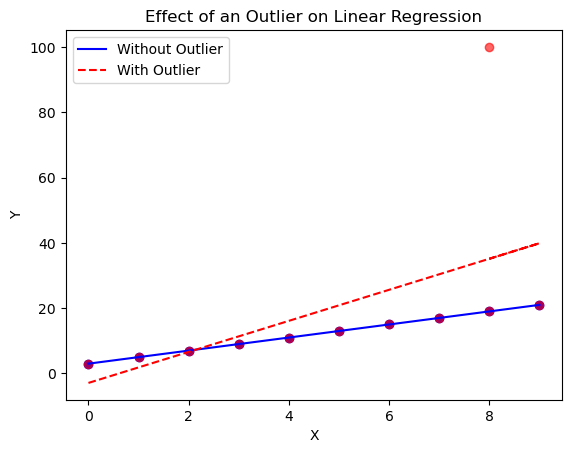

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating some sample data
x = [i for i in range(10)]
y = [2*i + 3 for i in range(10)]

# Without Outlier
m, b = np.polyfit(x, y, 1)  # Calculate the slope and intercept
plt.scatter(x, y, color='blue')
plt.plot(x, [m*i + b for i in x], color='blue', label='Without Outlier')

# Adding an outlier
x.append(8)
y.append(100)

# With Outlier
m, b = np.polyfit(x, y, 1)  # Calculate the slope and intercept with outlier
plt.scatter(x, y, color='red', alpha=0.6)
plt.plot(x, [m*i + b for i in x], color='red', linestyle='--', label='With Outlier')

plt.title('Effect of an Outlier on Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



***The outlier in the above example drastically changed the relationship and fit of the linear regression model.***

### **How do we identify outliers in the data?**

One common way to check for outliers is using ***boxplots***. A boxplot can visually show potential outliers as data points that fall outside the "whiskers" or ends of the boxes.



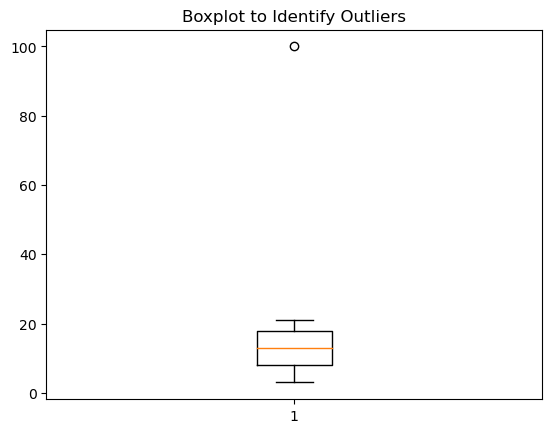

In [ ]:
plt.boxplot(y)
plt.title('Boxplot to Identify Outliers')
plt.show()


Another method to identify outliers is the **z-score**.

**Z-scores** measure the number of standard deviations an element is from the mean. A z-score ```greater than 3 or less than -3``` typically indicates that an item is an ```outlier```.

In [ ]:
from scipy.stats import zscore
y_df = pd.DataFrame(y)

y_df["z-scores"] = zscore(y)

print(y_df)


      0  z-scores
0     3 -0.656767
1     5 -0.579501
2     7 -0.502234
3     9 -0.424967
4    11 -0.347700
5    13 -0.270434
6    15 -0.193167
7    17 -0.115900
8    19 -0.038633
9    21  0.038633
10  100  3.090670


You may note that the outlier value "100" has a z-score of 3.09.

**Note - The cut-off value of +/- 3 is a rule of thumb. Depending on the context, you may define this to be less or more.**

### **Handling Outliers**

**Winsorization**

One approach to handle outliers is Winsorization.
It involves setting extreme values to a specified percentile of the data. For example, we may replace very small or very large values by some boundary values.


In [ ]:
from scipy.stats import mstats

# Winsorizing data at 10% and 90% percentiles

y = np.array(y) # y is a list of values to be winsorized. We convert it to a numpy array for mathematical operations.
y_winsorized = mstats.winsorize(y, limits=[0.1, 0.1])

print(y_winsorized)


[ 5  5  7  9 11 13 15 17 19 21 21]


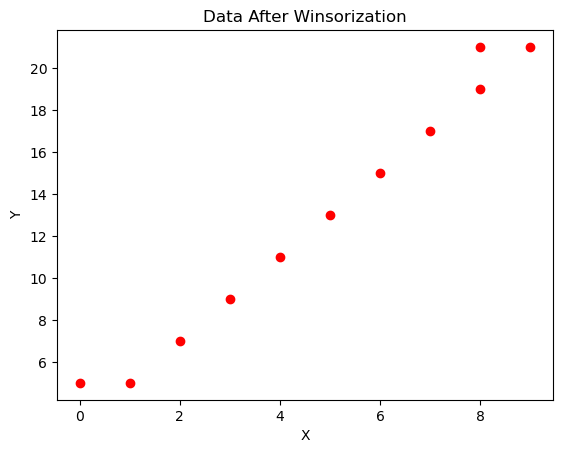

In [ ]:
plt.scatter(x, y_winsorized, color='red')
plt.title('Data After Winsorization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# **Dummy Coding Categorical Variables**

### **Why dummy Coding?**

Categorical data consists of variables that can take on specific, limited values such as 'Yes' or 'No', 'Red', 'Green', or 'Blue', etc. These values don't have any inherent numerical relationship, making it difficult for machine learning algorithms to directly interpret them. To address this issue, we use a technique called **dummy coding**.

Dummy coding involves converting categorical variables into a binary (0 or 1) representation, where each unique category becomes a separate binary column. This enables machine learning algorithms to work with categorical data effectively, as they can now treat each category as an independent feature with a clear numerical interpretation.


### **Performing Dummy Coding**

We can use `pd.get_dummies()` function to perform dummy coding on categorical data.

It creates a new DataFrame where each category becomes a new column with binary values (1 and 0) representing its presence or absence of the category.

For example, let's use a small dataset:

In [ ]:
# Creating a small example dataset
data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Blue'],
        'Size': ['Small', 'Large', 'Medium', 'Medium', 'Small']}

df = pd.DataFrame(data)

print(df)

   Color    Size
0    Red   Small
1  Green   Large
2   Blue  Medium
3    Red  Medium
4   Blue   Small


There are three categories in color and three in size as you can see below.

In [ ]:
print('Option in colors: \n', df.Color.value_counts())
print('\n')
print('Option in sizes: \n', df.Size.value_counts())

Option in colors: 
 Red      2
Blue     2
Green    1
Name: Color, dtype: int64


Option in sizes: 
 Small     2
Medium    2
Large     1
Name: Size, dtype: int64


After dummy coding, there will be a separate column for each color and each size.

In [ ]:
# Performing dummy coding with default options
dummy_df_default = pd.get_dummies(df)

print('Default options: \n', dummy_df_default.head())

Default options: 
    Color_Blue  Color_Green  Color_Red  Size_Large  Size_Medium  Size_Small
0           0            0          1           0            0           1
1           0            1          0           1            0           0
2           1            0          0           0            1           0
3           0            0          1           0            1           0
4           1            0          0           0            0           1


If you think carefully, we don't need all three columns to represent the three color categories or three columns to represent three sizes. This is because we can ascertain all three colors by asking only two questions: 1) is the color Blue 2) is the color Green. If the answer to any of these two questions is yes (1), we not the color or if the answer to both the questions is no (0), we know the color must be Red.

Therefore, we may drop one column for color and one column for size and still retain all the information that we have.

In [ ]:
# Performing dummy coding with drop_first = True
dummy_df_drop_first = pd.get_dummies(df, drop_first=True)

print('Dropping first options: \n', dummy_df_drop_first.head())

Dropping first options: 
    Color_Green  Color_Red  Size_Medium  Size_Small
0            0          1            0           1
1            1          0            0           0
2            0          0            1           0
3            0          1            1           0
4            0          0            0           1


You should be wondering why `Blue` color  and `Large` size were dropped.

They were dropped because alphabetically they come first in their respective categories.

# **Scaling Data** (Optional)

**Why is Scaling Important?**

In modeling, the scale on which independent variables are measured have direct impact on the interpretation of the model coefficients.

Consider a scenario where we have two features: age (measured in years) and experience (measured in months). The coefficients obtained from a linear regression model will be affected by the scale of these features. By scaling them to a standard scale, the coefficients become more interpretable and comparable.

Moreover, In machine learning, when different features have different scales, algorithms that rely on distance or gradient (like linear regression, k-means, or gradient descent) will not perform optimally.

**Z-Scoring**
Z-scoring, is also known as standard scaling,. This scaling centers the data around zero and scales based on standard deviation.

